In [1]:
import sys
import os

sys.path.append('/Users/mk/repos/inshorts-nlp')
os.getcwd()

'/Users/mk/repos/inshorts-nlp/notebooks'

In [2]:
from app.main.data.repository import LabeledContentRepositoryContainer


repository = LabeledContentRepositoryContainer.instance
corpora = repository.scan()

[2018-12-10 09:09:23,692] INFO in DynamoDb: Initializing DynamoDB connection
[2018-12-10 09:09:23,823] INFO in DynamoDb: Table labeled_content already exists, skipping creation
[2018-12-10 09:09:23,825] INFO in DynamoDb: DynamoDB connection ready


In [3]:
import pandas as pd

df = pd.DataFrame(corpora)
df.head()

,content,label
0,'Kedarnath' director Abhishek Kapoor has said ...,entertainment
1,'Kedarnath' director Abhishek Kapoor has tweet...,entertainment
2,'Udta Punjab' star Diljit Dosanjh has revealed...,entertainment
3,Actor Alok Nath has gone missing after a rape ...,entertainment
4,Actress Deepika Padukone beat Priyanka Chopra ...,entertainment


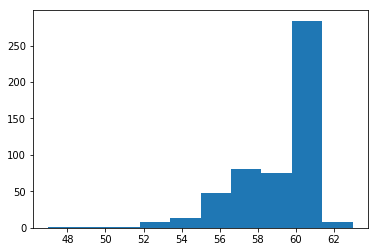

521

In [4]:
# content length histogram
%matplotlib inline
import matplotlib.pyplot as plt

def count_words(text):
    return len(text.split(' '))

lengths = list(map(count_words, df.content.tolist()))
plt.hist(lengths)
plt.show()

len(lengths)

In [5]:
repository.get_by_label('business')


[{'content': "A Chinese consortium led by Anta Sports has reached a $5.2-billion deal to acquire Finland's Amer Sports. Amer makes the Wilson tennis rackets used by Serena Williams as well as Atomic and Salomon ski equipment. Others in the consortium include Chip Wilson, the billionaire founder of yoga-apparel retailer Lululemon Athletica, and Chinese internet giant Tencent Holdings.\n",
  'label': 'business'},
 {'content': 'A day after making a series of tweets requesting Indian government and banks to take back the money owed to them, Vijay Mallya tweeted again saying, "I want to stop the narrative that I stole money." Mallya said his upcoming extradition hearing and the extradition of AgustaWestland middleman from Dubai are "not linked in any way" to his settlement offer.',
  'label': 'business'},
 {'content': "A district consumer forum in Ahmedabad has ordered Indian Overseas Bank to pay ₹10,000 to a customer for sharing his bank details with his wife. The customer sued the bank fo